<a href="https://colab.research.google.com/github/Shivam-Riyar/MachineLearningPractice/blob/main/Simple_Linear_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import random
import numpy as np
import pandas as pd
np.random.seed(42)
cgpa = np.round(np.random.uniform(5, 10, 150), 2)

package = []

for score in cgpa:
    if score >= 9:
        package.append(np.round(random.uniform(15, 25), 2))
    elif score >= 7:
        package.append(np.round(random.uniform(7, 15), 2))
    else:
        package.append(np.round(random.uniform(3, 7), 2))

data = pd.DataFrame({
    'CGPA': cgpa,
    'Package (LPA)': package
})


print(data.head())
data.to_csv('students_cgpa_package.csv', index=False)
print("Dataset saved as 'students_cgpa_package.csv'.")

   CGPA  Package (LPA)
0  6.87           4.03
1  9.75          15.54
2  8.66          14.36
3  7.99          11.62
4  5.78           3.12
Dataset saved as 'students_cgpa_package.csv'.


In [1]:
class MyLR :
  def __init__(self):
    self.m = None
    self.b = None


  def fit(self, X_train, y_train):
    num = 0
    den = 0
    for i in range(X_train.shape[0]):
      num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
      den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
    self.m = num/den
    self.b = y_train.mean() - (self.m * X_train.mean())


  def predict(self, X_test):
    return self.m * X_test + self.b



In [4]:
df = pd.read_csv('students_cgpa_package.csv')
df.head()


,CGPA,Package (LPA)
0,6.87,4.03
1,9.75,15.54
2,8.66,14.36
3,7.99,11.62
4,5.78,3.12


In [5]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape

(120,)

In [10]:
lr = MyLR()
lr.fit(X_train,y_train)
X_train[0]
X_test[0]

5.29

In [9]:
print(lr.predict(X_test[0]))

2.604957506048004


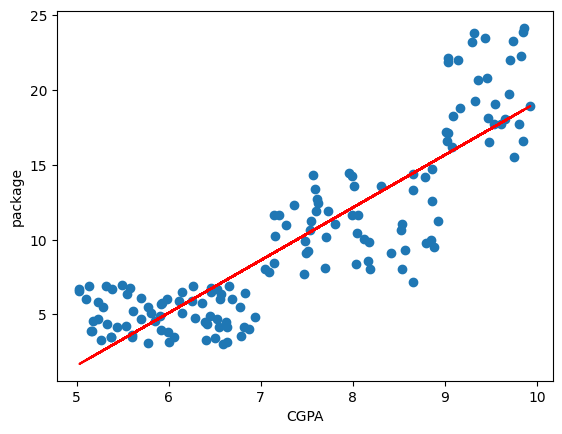

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df['CGPA'],df['Package (LPA)']) # Updated column name to 'CGPA' to match the DataFrame
plt.xlabel('CGPA')
plt.ylabel('package')
plt.plot(X_train,lr.predict(X_train),color='red')